In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import astroalign as aa
from astropy.io import fits
import processing as  pr
from astropy.modeling.functional_models import Sersic1D
from astropy.modeling import models, fitting
from photutils.centroids import centroid_quadratic

/opt/anaconda3/envs/LU3PY232/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
data_dir = "/Users/laigle/M83_raw_data/"
output_dir = "/Users/laigle/M83_processed/"

### Charge l'image traitée

In [14]:
image = fits.getdata(output_dir + 'image_finale_Ha.fits')

### Trouver son centre

In [15]:
## xpeak and ypeak are the approximate position of the centroid
xycen = centroid_quadratic(image, xpeak=2040, ypeak=2100,search_boxsize = 400)

### Afficher l'image, et y superposer le centre

In [ ]:
plt.imshow(image,vmin=np.mean(image)-np.std(image),vmax = np.mean(image)+np.std(image),cmap='gray')  # subtract the background)
plt.scatter(xycen[0],xycen[1],color='red',marker='+')

ax = plt.gca()
ax.set_xlim(xycen[0]-500,xycen[0]+500)
ax.set_ylim(xycen[1]-500,xycen[1]+500)

### calculer le profil radial a partir du centre

In [50]:
edge_radii = np.arange(800)
rp,pp,errp = pr.RadialProfile(image, xycen, edge_radii)

### soustraire le fond de ciel de l'image

In [51]:
background = np.mean(pp[600:])
profil = pp-background

### afficher le profil

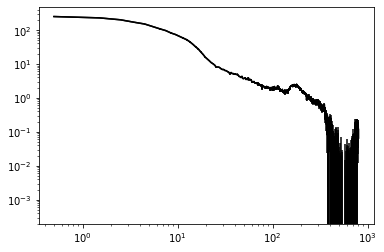

In [52]:
plt.errorbar(rp,profil,yerr = errp,color='black')
plt.plot(rp,profil,color='black')
axes = plt.gca()
axes.set_yscale('log')
axes.set_xscale('log')

### Fitter le profil mesuré avec un double profil de sersic

In [53]:
g,g2 = pr.fit_sersic(rp,profil,(np.max(profil)/10.,10,1),[0,100],A1_r1_n1=(0,0,0),range1=[100,800])

### Afficher le profil mesuré et son meilleur fit 

In [ ]:
print(g)

plt.errorbar(rp,profil,yerr = errp,color='black')
plt.plot(rp,profil,color='black')
plt.plot(rp,g(rp))
axes = plt.gca()

axes.set_yscale('log')
axes.set_xscale('log')

axes.set_ylim(0.01,500)
axes.set_xlim(1,2000)
axes.grid()
axes.set_xlabel('rayon (pixel)',fontsize=16)
axes.set_ylabel('brillance de surface',fontsize=16)

### Recommencer en ajoutant un deuxième profil pour fitter la partie externe

In [ ]:
g,g2 = pr.fit_sersic(rp,profil,(np.max(profil)/10.,10,1),[0,100],A1_r1_n1=(np.max(profil)/100.,100,1),range1=[100,800])

### Afficher de nouveau les profils 

In [ ]:
plt.errorbar(rp,profil,yerr = errp,color='black')
plt.plot(rp,profil,color='black')

plt.plot(rp,g(rp))
plt.plot(rp,g2(rp))
plt.plot(rp,g(rp)+g2(rp))
axes = plt.gca()
print(g2)
axes.set_yscale('log')
axes.set_xscale('log')

axes.set_ylim(0.01,500)
axes.set_xlim(1,2000)
axes.grid()

axes.set_xlabel('rayon (pixel)',fontsize=16)
axes.set_ylabel('brillance de surface',fontsize=16)